# Final Project : Exploring Factors Influencing Health and Lifestyle Choices - Heart Disease Dataset

## Objective :

* The goal of this project is to use a real-world health and lifestyle dataset to
uncover relationships and test hypotheses regarding factors that may influence
health outcomes, such as BMI, exercise habits, smoking, or diet. 
* Students will apply hypothesis testing, correlation analyses (Pearson, Spearman, Kendall's Tau,
Point-Biserial, and Phi), and other techniques they have learned in class to derive
insights.

## 1. Data Familiarization : 

* Dataset from this link : 
https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset/data
* About 697,000 people in the United States died from heart disease in 2020—that’s 1 in every 5 deaths.

* What are the risk factors for heart disease?
High blood pressure, high blood cholesterol, and smoking are key risk factors for heart disease. About half of people in the United States (47%) have at least one of these three risk factors.
* Several other medical conditions and lifestyle choices can also put people at a higher risk for heart disease, including
    * Diabetes
    * Overweight and obesity
    * Unhealthy diet
    * Physical inactivity
    * Excessive alcohol use
* Dataset Overview
    * Gender : sex of the individual (Male, Female)
    * age : age of the individual (years)
    * education : education level (categorical, uneducated, primaryschool, graduate, postgraduate)
    * currentSmoker : whether the individual currently smokes (1 = yes, 0 = no)
    * cigsPerDay : number of cigarettes smoked per day (count)
    * BPMeds : currently taking blood pressure medication (1 = yes, 0 = no)
    * prevalentStroke : history of stroke (yes, no)
    * prevalentHyp : history of hypertension (1 = yes, 0 = no)
    * diabetes : diagnosed with diabetes (1 = yes, 0 = no)
    * totChol : total cholesterol level (mg/dL)
    * sysBP : systolic blood pressure (mmHg)
    * diaBP : diastolic blood pressure (mmHg)
    * BMI : body mass index (kg/m²)
    * heartRate : resting heart rate (beats per minute)
    * glucose : fasting blood glucose level (mg/dL)
    * Heart_stroke: presence of heart disease ( yes, no)

## 2. Data Cleaning & EDA (Exploratory Data Analysis) : 

Import the Function & Load the Data

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
from scipy.stats import spearmanr, chi2_contingency, ttest_ind, pearsonr, pointbiserialr, kendalltau

In [84]:
df = pd.read_csv('heart_disease.csv')
df.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
5,Female,43,primaryschool,0,0.0,0.0,no,1,0,228.0,180.0,110.0,30.30,77.0,99.0,No
6,Female,63,uneducated,0,0.0,0.0,no,0,0,205.0,138.0,71.0,33.11,60.0,85.0,yes
7,Female,45,primaryschool,1,20.0,0.0,no,0,0,313.0,100.0,71.0,21.68,79.0,78.0,No
8,Male,52,uneducated,0,0.0,0.0,no,1,0,260.0,141.5,89.0,26.36,76.0,79.0,No
9,Male,43,uneducated,1,30.0,0.0,no,1,0,225.0,162.0,107.0,23.61,93.0,88.0,No


Inspect the Missing Values :

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [86]:
df.isnull().sum()  

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

Drop off the Missing Values :

In [87]:
df_cleaned = df.dropna()

print(f"Original number of rows：{len(df)}")
print(f"Number of rows after cleaning：{len(df_cleaned)}")

Original number of rows：4238
Number of rows after cleaning：3656


In [88]:
df_cleaned.describe().round(2)

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00
mean,49.56,0.49,9.02,0.03,0.31,0.03,236.87,132.37,82.91,25.78,75.73,81.86
std,8.56,0.50,11.92,0.17,0.46,0.16,44.10,22.09,11.97,4.07,11.98,23.91
min,32.00,0.00,0.00,0.00,0.00,0.00,113.00,83.50,48.00,15.54,44.00,40.00
25%,42.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.08,68.00,71.00
50%,49.00,0.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.38,75.00,78.00
75%,56.00,1.00,20.00,0.00,1.00,0.00,263.25,144.00,90.00,28.04,82.00,87.00
max,70.00,1.00,70.00,1.00,1.00,1.00,600.00,295.00,142.50,56.80,143.00,394.00


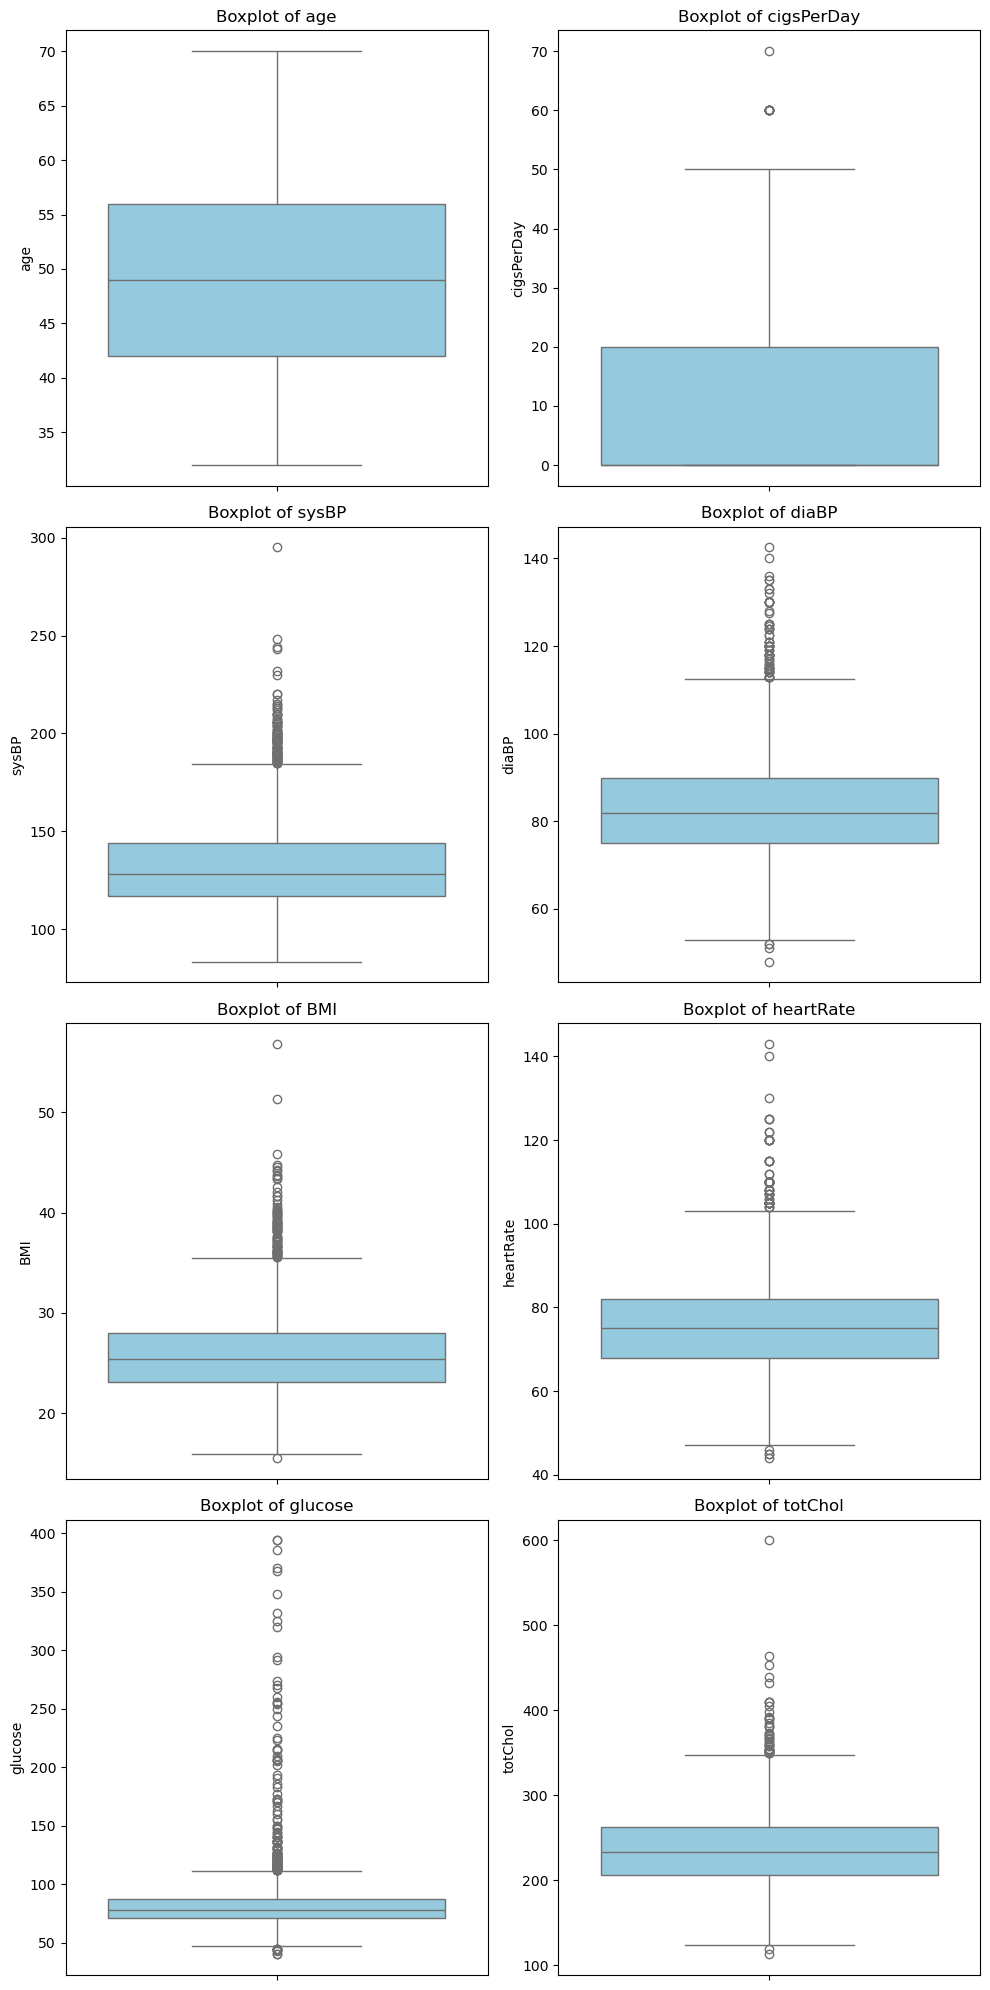

In [211]:
# Boxplot Charts
numeric_cols = ['age', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','totChol']

n_cols = 2
n_rows = -(-len(numeric_cols) // n_cols)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sb.boxplot(y=df_cleaned[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Conclution : 

The boxplots reveal several key patterns across health indicators, particularly the presence of significant outliers, which may indicate at-risk individuals:
* Age and Cigarettes per Day : Age is concentrated in the 40–55 range. A few individuals smoke over 60 cigarettes per day, indicating heavy smoking behavior.
* Blood Pressure (sysBP, diaBP) : Both systolic and diastolic pressures show many high outliers, suggesting a notable presence of hypertension risk.
* BMI : Slightly right-skewed with most values between 23 and 30, though some extreme values point to overweight or obesity.
* Heart Rate : Fairly symmetric distribution with a few extreme highs and lows, possibly indicating irregular heart conditions.
* Glucose : Numerous high outliers suggest many individuals may have hyperglycemia or diabetes.

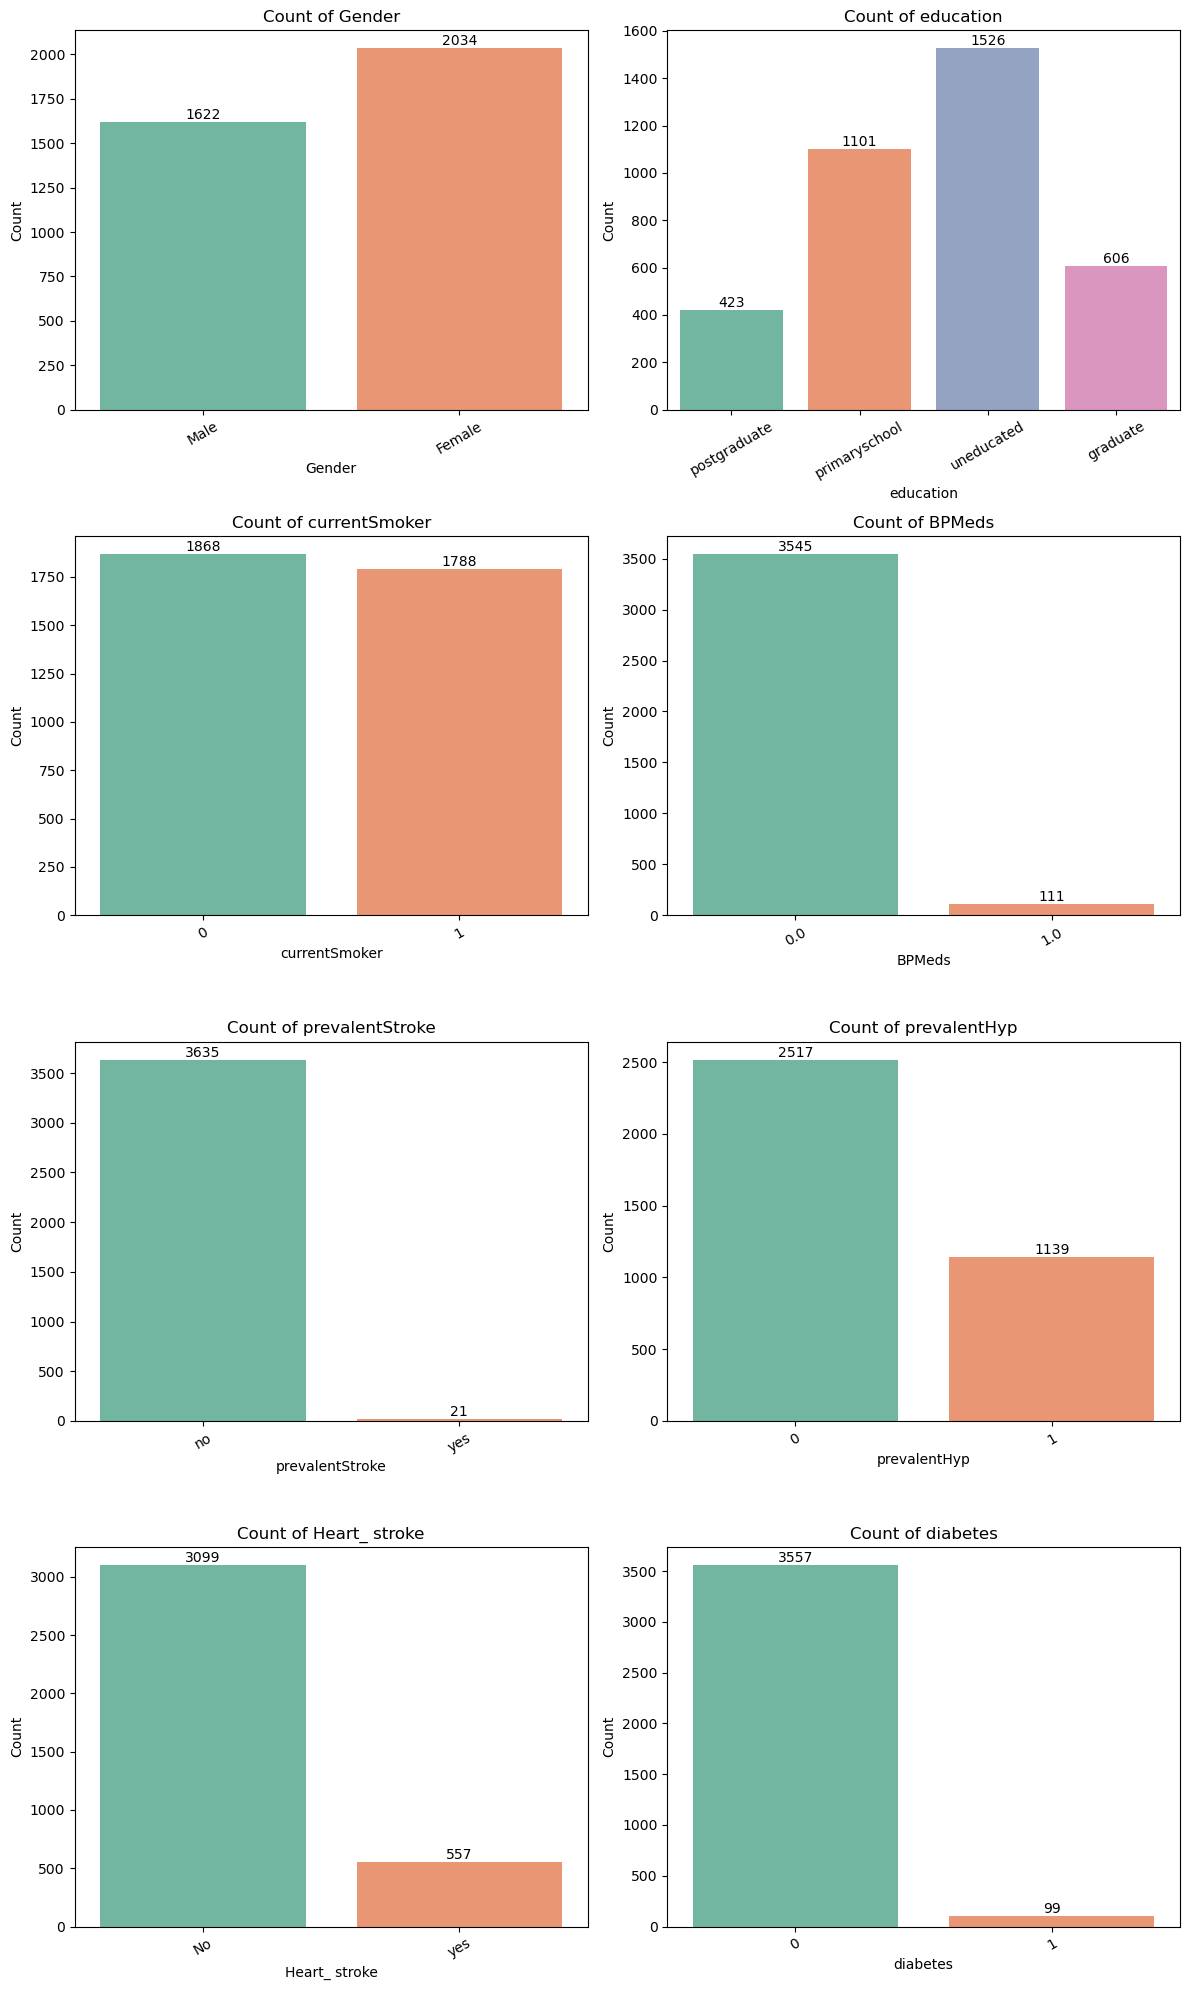

In [212]:
# Histogram Charts
categorical_cols = ['Gender', 'education', 'currentSmoker', 'BPMeds',
                    'prevalentStroke', 'prevalentHyp',
                    'Heart_ stroke', 'diabetes']

n_cols = 2
n_rows = -(-len(categorical_cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sb.countplot(data=df_cleaned, x=col, hue=col, ax=axes[i], palette='Set2', legend=False)

    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{int(height)}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=10)

    axes[i].set_title(f'Count of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=30)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Conclution : 
The bar charts present the distribution of categorical variables in the dataset, offering insight into potential risk factors for heart disease:

* Gender: There are more females (2034) than males (1622) in the dataset.
* Education: The majority are uneducated (1526), followed by primary school (1101). Postgraduates (423) represent the smallest group, which may affect health awareness and lifestyle.
* Smoking Behavior (currentSmoker): Nearly half of the participants are current smokers (1788), showing that smoking is a common behavior.
* Blood Pressure Medication (BPMeds): Only 111 participants are on medication, while 3545 are not—indicating that treatment rates may be low.
* Stroke History (prevalentStroke): Very few individuals (21) have had a stroke, but it's an important variable to monitor for heart disease correlations.
* Hypertension History (prevalentHyp): About one-third (1139) have a history of high blood pressure, which is a major risk factor for heart disease.
* Heart Disease (Heart_stroke): 557 individuals (around 15%) have heart disease, making this the key outcome variable in the study.

As previously discussed, factors such as hypertension, high cholesterol, smoking, diabetes, and being overweight or obese are all likely contributors to an increased risk of heart disease. Therefore, we will now proceed to analyze these variables in more detail.

## 3. Hypothesis Testing :

#### 1. According to clinical standards (systolic BP ≥140), are individuals with hypertension more likely to have heart disease? (Chi-Square Test)

* H₀ (Null Hypothesis) : There is no significant association between having systolic blood pressure above 140 mmHg and heart disease.
* H₁ (Alternative Hypothesis) : Individuals with systolic BP > 140 mmHg are significantly more likely to have heart disease.

In [152]:
# Step 1: Create a new column to indicate high systolic blood pressure (sysBP > 140)
df_cleaned.loc[:, 'high_sysBP'] = np.where(df_cleaned['sysBP'] > 140, 1, 0) # 1 = yes, 0 = no

# Step 2: Build a contingency table (high systolic BP vs. Heart_stroke)
contingency = pd.crosstab(df_cleaned['high_sysBP'], df_cleaned['Heart_ stroke'])
print("Contingency Table:")
print(contingency)

# Step 3: Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")

Contingency Table:
Heart_ stroke    No  yes
high_sysBP              
0              2307  285
1               792  272

Chi-square statistic: 122.8506
P-value: 0.0000
Degrees of freedom: 1


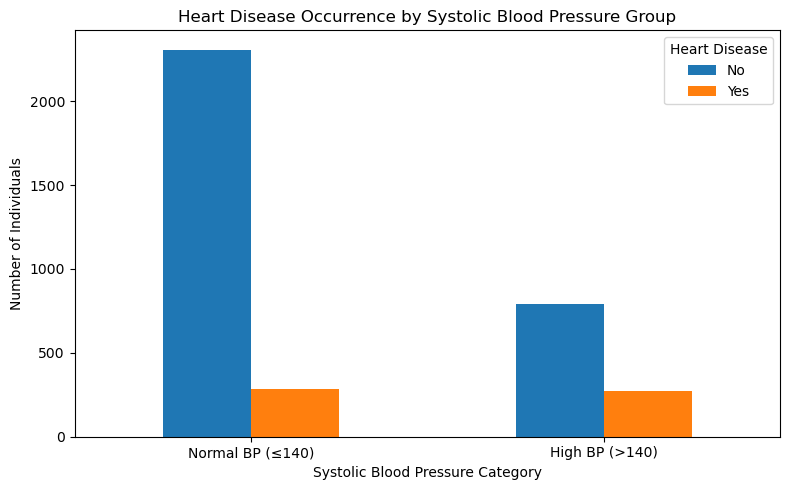

In [92]:
# Reconstruct the DataFrame based on the provided contingency table
data = {
    'Heart_ stroke': ['No', 'Yes'],
    'Normal BP (≤140)': [2307, 285],
    'High BP (>140)': [792, 272]
}

df_plot = pd.DataFrame(data)
df_plot.set_index('Heart_ stroke', inplace = True)
df_plot = df_plot.T  # Transpose the DataFrame for grouped bar chart plotting

# Plot the chart
ax = df_plot.plot(kind = 'bar', figsize = (8, 5))
plt.title('Heart Disease Occurrence by Systolic Blood Pressure Group')
plt.ylabel('Number of Individuals')
plt.xlabel('Systolic Blood Pressure Category')
plt.xticks(rotation = 0)
plt.legend(title = 'Heart Disease')
plt.tight_layout()
plt.show()

Conclution : 
* According to clinical guidelines, systolic blood pressure ≥140 mmHg is considered hypertension. Based on the Chi-Square test, the test statistic is 122.85 with a p-value of 0.0000, indicating a highly significant result (p < 0.05).
* Thus, we reject the null hypothesis, meaning there is a statistically significant association between having systolic BP > 140 mmHg and the likelihood of having heart disease.
* The bar chart also supports this finding, showing that a higher proportion of individuals with elevated systolic BP have heart disease compared to those with normal BP.

Individuals with hypertension are more likely to have heart disease and should be considered a high-risk group.

#### 2. Is the average total cholesterol level (totChol) higher among individuals with heart disease than those without? (T-test)

* H₀ (Null Hypothesis) : There is no significant difference in total cholesterol levels between individuals with and without heart disease.
* H₁ (Alternative Hypothesis) : Individuals with heart disease have a significantly higher average total cholesterol level than those without.

In [93]:
# Step 1: Separate the data into two groups based on heart disease status
chol_with_hd = df_cleaned[df_cleaned['Heart_ stroke'] == 'yes']['totChol']
chol_without_hd = df_cleaned[df_cleaned['Heart_ stroke'] == 'No']['totChol']

# Step 2: Perform an independent t-test (Welch's t-test for unequal variances)
t_stat, p_value = ttest_ind(chol_with_hd, chol_without_hd, equal_var = False)

# Step 3: Print the test results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 5.1066
P-value: 0.0000


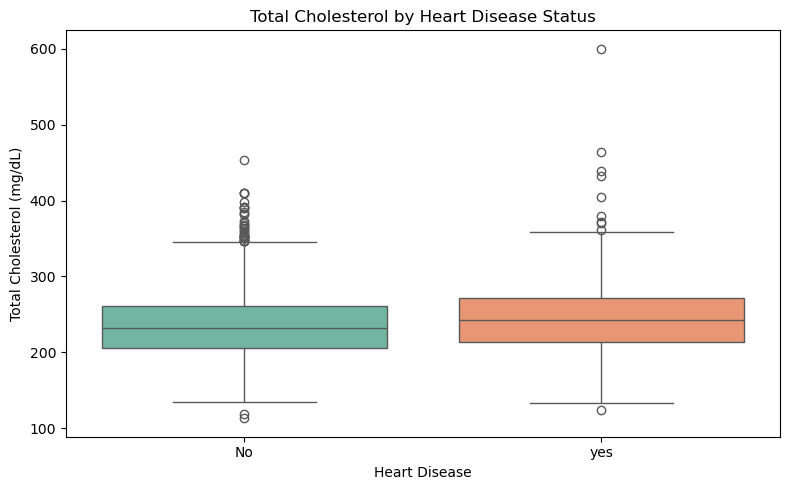

In [94]:
plt.figure(figsize = (8, 5))
sb.boxplot(x = 'Heart_ stroke', y = 'totChol', data = df_cleaned, hue = 'Heart_ stroke', palette = 'Set2', legend = False)
plt.title('Total Cholesterol by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Total Cholesterol (mg/dL)')
plt.tight_layout()
plt.show()

Conclution : 
* The T-test result shows a t-statistic of 5.1066 and a p-value of 0.0000, which is well below the 0.05 significance level. This indicates a highly statistically significant difference.
* Therefore, we reject the null hypothesis and conclude that individuals with heart disease have a significantly higher average total cholesterol level than those without.
* The boxplot further supports this, showing a higher median and more high-end outliers in the heart disease group.

People with heart disease tend to have higher cholesterol levels on average, suggesting a possible positive relationship between cholesterol and heart disease risk.

#### 3. Do individuals with heart disease smoke more cigarettes per day (on average) compared to those without? (T-test)

* H₀ (Null Hypothesis):
There is no significant difference in the average number of cigarettes smoked per day between individuals with and without heart disease.
* H₁ (Alternative Hypothesis):
Individuals with heart disease smoke significantly more cigarettes per day than those without.

In [95]:
# Step 1: Split the data based on heart disease status
smoke_with_hd = df_cleaned[df_cleaned['Heart_ stroke'] == 'yes']['cigsPerDay']
smoke_without_hd = df_cleaned[df_cleaned['Heart_ stroke'] == 'No']['cigsPerDay']

# Step 2: Run Welch's t-test (assumes unequal variances)
t_stat, p_value = ttest_ind(smoke_with_hd, smoke_without_hd, equal_var = False)

# Step 3: Output the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 2.9522
P-value: 0.0033


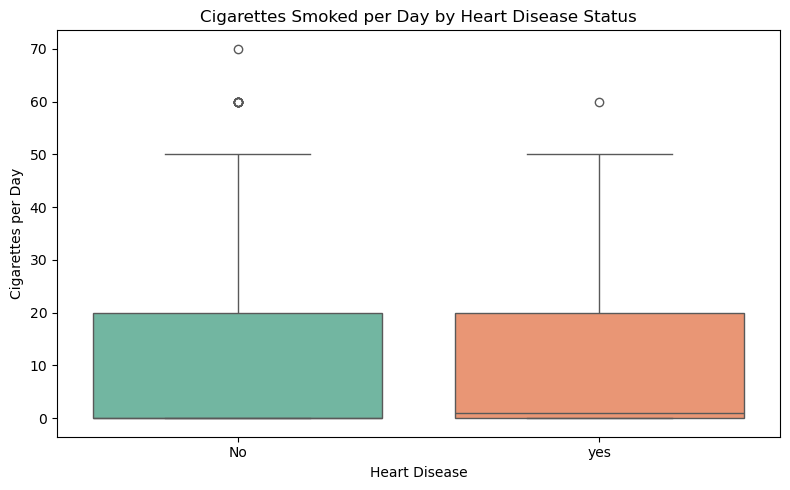

In [96]:
# Set figure size
plt.figure(figsize=(8, 5))

# Draw boxplot
sb.boxplot(x = 'Heart_ stroke', y = 'cigsPerDay', data = df_cleaned, hue = 'Heart_ stroke', palette = 'Set2', legend = False)

# Customize plot
plt.title('Cigarettes Smoked per Day by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Cigarettes per Day')
plt.tight_layout()

# Show plot
plt.show()

Conclution :
* The T-test yields a t-statistic of 2.9522 and a p-value of 0.0033, which is below the 0.05 threshold for significance. This indicates a statistically significant difference.
* Therefore, we reject the null hypothesis, suggesting that individuals with heart disease smoke significantly more cigarettes per day on average than those without.
* Although the boxplot shows similar distributions, the statistical test confirms that the average number of cigarettes smoked is slightly higher among heart disease patients—supporting a possible link between smoking and heart disease.

Individuals with heart disease tend to smoke more, reinforcing smoking as a potential risk factor for heart disease.

In [158]:
heavy_smokers = df_cleaned[df_cleaned['cigsPerDay'] >= 60]

print(heavy_smokers)

     Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
327    Male   56     uneducated              1        60.0     0.0   
721    Male   59     uneducated              1        60.0     0.0   
1054   Male   58  primaryschool              1        60.0     0.0   
1452   Male   39     uneducated              1        60.0     0.0   
1468   Male   50     uneducated              1        60.0     0.0   
1488   Male   37   postgraduate              1        60.0     0.0   
1849   Male   48     uneducated              1        60.0     0.0   
2709   Male   46     uneducated              1        60.0     0.0   
3008   Male   40       graduate              1        70.0     0.0   
3928   Male   67  primaryschool              1        60.0     0.0   

     prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
327               no             0         0    246.0  125.0   79.0  29.64   
721               no             1         0    298.0  153.5  105.0  25.0

#### 4. Is the average blood glucose level (glucose) significantly higher among individuals with heart disease? (T-test)

* H₀ (Null Hypothesis):
There is no significant difference in the average blood glucose levels between individuals with and without heart disease.
* H₁ (Alternative Hypothesis):
Individuals with heart disease have significantly higher average blood glucose levels than those without heart disease.

In [97]:
# Step 1: Separate data by heart disease status
glucose_with_hd = df_cleaned[df_cleaned['Heart_ stroke'] == 'yes']['glucose']
glucose_without_hd = df_cleaned[df_cleaned['Heart_ stroke'] == 'No']['glucose']

# Step 2: Perform Welch’s t-test (assumes unequal variances)
t_stat, p_value = ttest_ind(glucose_with_hd, glucose_without_hd, equal_var=False)

# Step 3: Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 4.6041
P-value: 0.0000


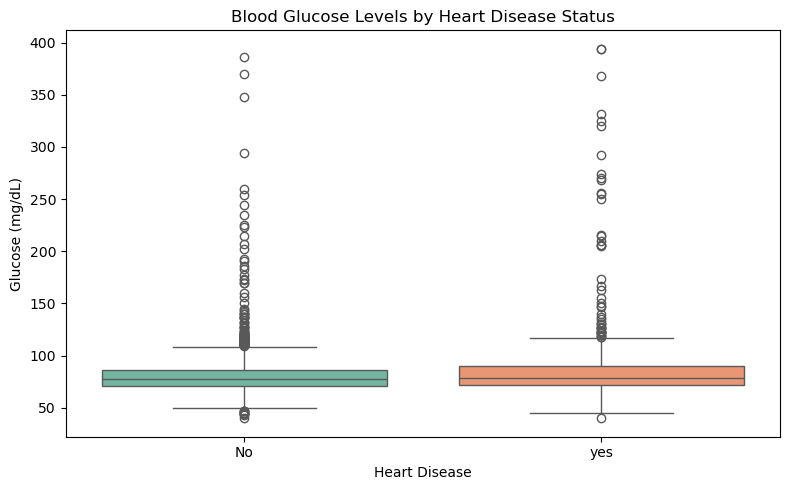

In [98]:
# Set figure size
plt.figure(figsize=(8, 5))

# Draw boxplot
sb.boxplot(x = 'Heart_ stroke', y = 'glucose', data = df_cleaned, hue = 'Heart_ stroke', palette = 'Set2', legend = False)

# Customize
plt.title('Blood Glucose Levels by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Glucose (mg/dL)')
plt.tight_layout()

# Show plot
plt.show()

Conclution : 
* The T-test yields a t-statistic of 4.6041 and a p-value of 0.0000, which is well below the 0.05 significance level. This indicates a highly statistically significant difference.
* Therefore, we reject the null hypothesis, concluding that individuals with heart disease have significantly higher average blood glucose levels than those without heart disease.
* The boxplot also supports this finding, showing a slightly higher median and interquartile range, along with more extreme high outliers in the heart disease group.

Individuals with heart disease tend to have higher blood glucose levels, suggesting that high glucose or diabetes may be an important risk factor associated with heart disease.

#### 5. Is the average body mass index (BMI) higher among individuals with heart disease than those without? (T-test)

* H₀ (Null Hypothesis):
There is no significant difference in the average body mass index (BMI) between individuals with and without heart disease.
* H₁ (Alternative Hypothesis):
Individuals with heart disease have a significantly higher average BMI than those without.

In [99]:
# Step 1: Split the dataset by heart disease status
bmi_with_hd = df_cleaned[df_cleaned['Heart_ stroke'] == 'yes']['BMI']
bmi_without_hd = df_cleaned[df_cleaned['Heart_ stroke'] == 'No']['BMI']

# Step 2: Perform Welch’s t-test (assumes unequal variance)
t_stat, p_value = ttest_ind(bmi_with_hd, bmi_without_hd, equal_var=False)

# Step 3: Output the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 4.5453
P-value: 0.0000


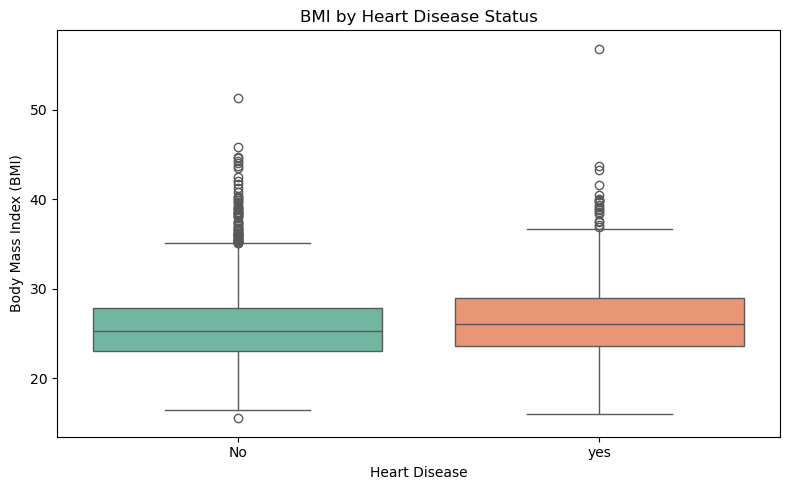

In [100]:
# Set figure size
plt.figure(figsize=(8, 5))

# Draw boxplot
sb.boxplot(x = 'Heart_ stroke', y = 'BMI', data = df_cleaned, hue = 'Heart_ stroke', palette = 'Set2', legend = False)

# Customize plot
plt.title('BMI by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Body Mass Index (BMI)')
plt.tight_layout()

# Show plot
plt.show()


Conclution : 
* The T-test yields a t-statistic of 4.5453 and a p-value of 0.0000, which is well below the 0.05 significance threshold, indicating a highly significant result.
* Therefore, we reject the null hypothesis, and conclude that individuals with heart disease have a significantly higher average BMI than those without.
* The boxplot supports this conclusion, showing a higher median and more high-end outliers in the heart disease group, suggesting that overweight or obesity is more common in individuals with heart disease.

There is a statistically significant association between higher BMI and heart disease, reinforcing the role of excess weight as a key risk factor.

#### **6. Heart Disease Risk Factors : Summary Conclusion**

---
Based on the statistical analysis conducted on key health factors, we found that
* High blood pressure
* High cholesterol
* Smoking
* High blood glucose
* High BMI

are all significantly linked to heart disease. Targeted prevention strategies and lifestyle interventions focusing on these risk factors are highly recommended to reduce the risk of heart disease.

## 4. Correlation Testing :

#### 1. Correlation Heatmap: BP, Cholesterol, Smoking, Glucose, BMI

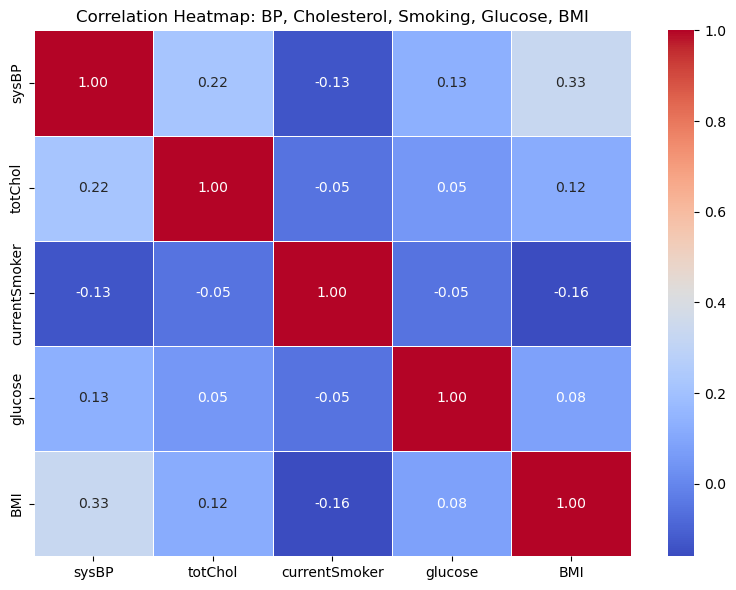

In [169]:
features = ['sysBP', 'totChol', 'currentSmoker', 'glucose', 'BMI']
corr_matrix = df_cleaned[features].corr()

plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: BP, Cholesterol, Smoking, Glucose, BMI')
plt.tight_layout()
plt.show()

Conclution : 
From the correlation heatmap, we observe the following:

* Systolic blood pressure (sysBP) and BMI have the strongest correlation (r = 0.33), indicating a moderate positive relationship—individuals with higher BMI tend to have higher systolic BP.
* sysBP and total cholesterol (totChol) also show a weak positive correlation (r = 0.22).
* Current smoking status (currentSmoker) is negatively correlated with other factors, but all correlations are weak to very weak (maximum |r| = 0.16).
* Glucose levels show minimal linear correlation with other variables, with the highest being just r = 0.13.

In summary, most of these five health risk factors exhibit weak to moderate linear correlations, suggesting that while they may collectively contribute to health outcomes, they are not strongly linearly related to each other.

#### 2. Is there a linear correlation between systolic blood pressure (sysBP) and heart rate? (Pearson Correlation)

In [189]:
x = df_cleaned['heartRate']
y = df_cleaned['sysBP']

corr, p_value = pearsonr(x, y)

print(f"Pearson correlation coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: 0.1849
P-value: 0.0000


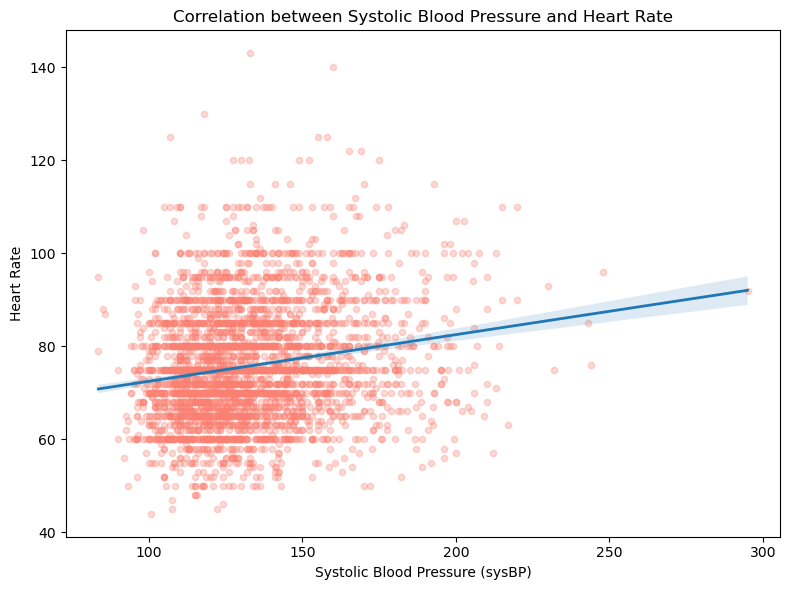

In [191]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create scatter plot with regression line
sb.regplot(x='sysBP', y='heartRate', data=df_cleaned, 
           scatter_kws={'alpha':0.3, 'color':'salmon', 's':20}, line_kws={'linewidth':2})

# Set titles and labels
plt.title('Correlation between Systolic Blood Pressure and Heart Rate')
plt.xlabel('Systolic Blood Pressure (sysBP)')
plt.ylabel('Heart Rate')

# Show the plot
plt.tight_layout()
plt.show()

Conclution : 

Weak positive correlation between heart rate and systolic blood pressure (r ≈ 0.18). Here's how to interpret that :
* There is a physiological link :
    * Sympathetic nervous system activation (e.g., stress, exercise) increases both heart rate and blood pressure.
    * This explains the positive direction of the relationship.

* Static vs. dynamic measurement:
    * The dataset likely captures resting values.
    * In dynamic situations (e.g., during exercise), the relationship may be stronger.

#### 3. Correlation Heatmap of All Numerical Features : 

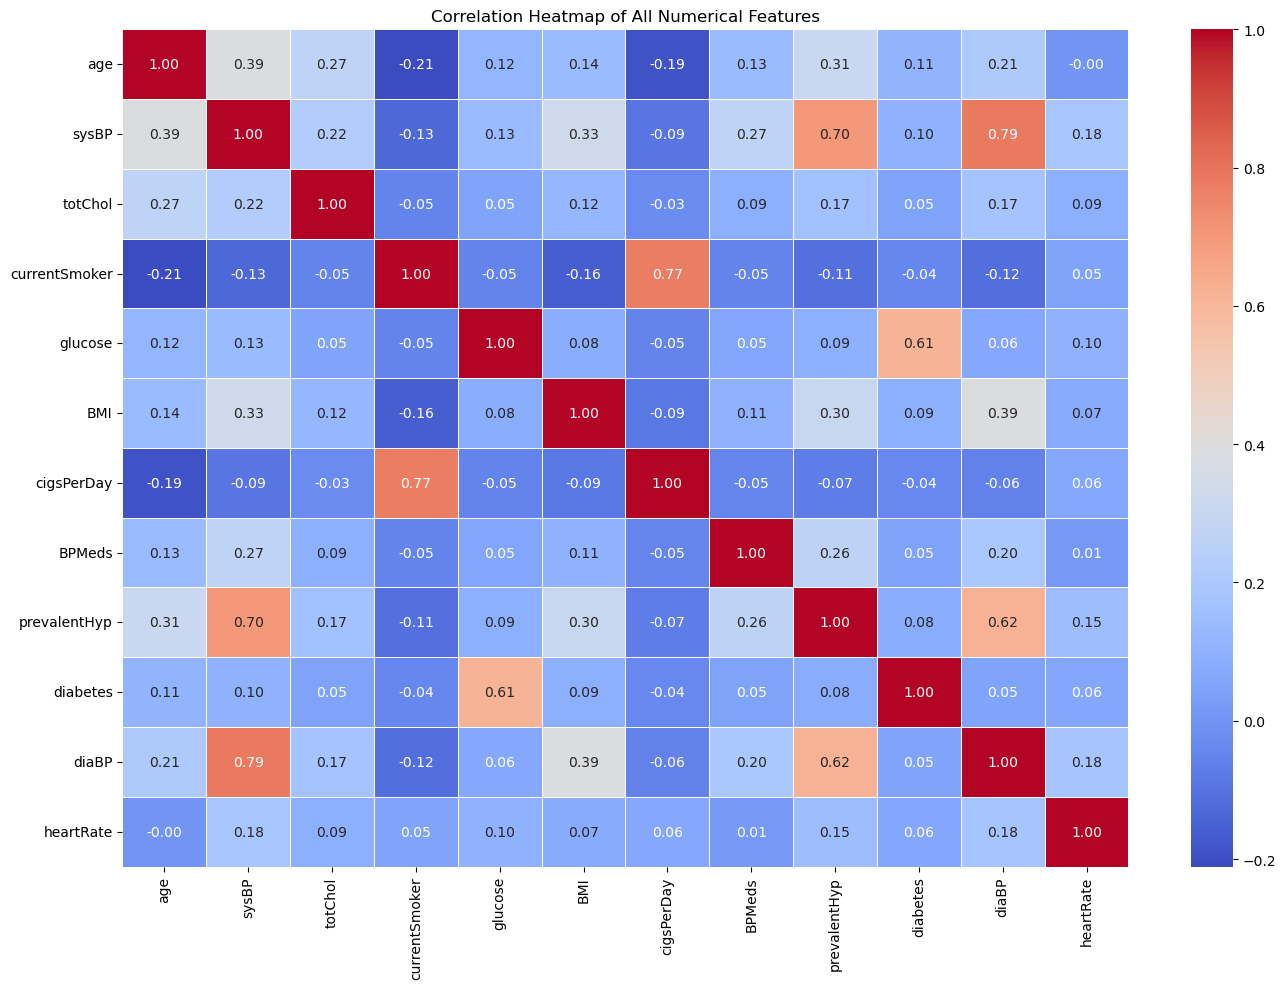

In [213]:
numeric_df = ['age', 'sysBP', 'totChol', 'currentSmoker', 'glucose', 'BMI','cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'diaBP', 'heartRate']
corr_matrix = df_cleaned[numeric_df].corr()

plt.figure(figsize=(14, 10))
sb.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Numerical Features')
plt.tight_layout()
plt.show()

Conclusion : 

The Pearson correlation coefficient of 0.61 between glucose and total cholesterol indicates a moderately strong positive linear relationship.
* This can be explained by :
    * Metabolic Syndrome Link : Both glucose and cholesterol are part of metabolic health markers.
    * Insulin resistance can lead to elevated glucose and also disrupt lipid metabolism, increasing cholesterol levels.
    * Individuals with elevated glucose levels (e.g., prediabetes or diabetes) often show dyslipidemia as well—high LDL or triglycerides.

#### 4. Is there a statistically significant association between gender and the presence of heart disease?

In [210]:
df_cleaned.loc[:, 'Gender_binary'] = df_cleaned['Gender'].map({'Female': 0, 'Male': 1})

contingency_table = pd.crosstab(df_cleaned['Gender_binary'], df_cleaned['Heart_ stroke'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
phi = np.sqrt(chi2 / n)

print("Contingency Table:")
print(contingency_table)
print(f"P-value: {p:.4f}")
print(f"Phi Coefficient (φ): {phi:.4f}")

Contingency Table:
Heart_ stroke    No  yes
Gender_binary           
0.0            1784  250
1.0            1315  307
P-value: 0.0000
Phi Coefficient (φ): 0.0910


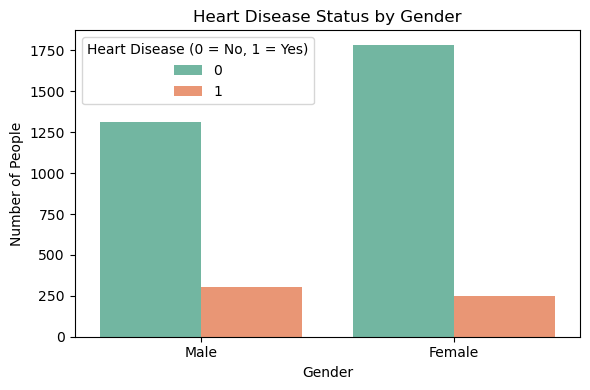

In [197]:
plt.figure(figsize=(6, 4))
sb.countplot(data=df_cleaned, x='Gender', hue='Heart_stroke_binary', palette='Set2')

plt.title('Heart Disease Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

Conclution : 

Based on the Chi-square test and Phi Coefficient analysis, there is a statistically significant association between gender and the presence of heart disease (p < 0.001).
* The chart suggests that males have a slightly higher proportion of heart disease compared to females
* However, the strength of the association is very weak (φ = 0.0910), indicating that while gender may be related to heart disease status, the effect size is minimal.


#### 5. Is there a statistically significant association between age and the presence of heart disease?

In [201]:
corr, p_value = pointbiserialr(df_cleaned['Heart_stroke_binary'], df_cleaned['age'])

print(f"Point-Biserial correlation coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Point-Biserial correlation coefficient: 0.2338
P-value: 0.0000


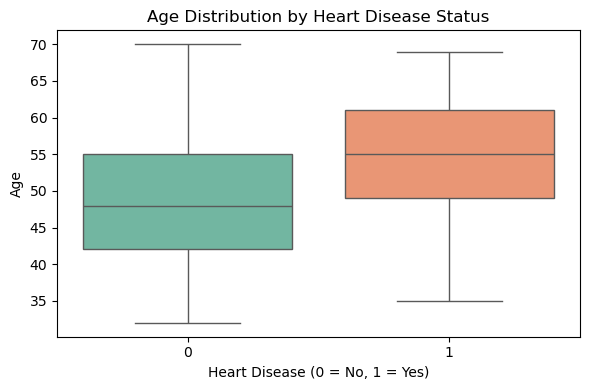

In [204]:
plt.figure(figsize=(6, 4))
sb.boxplot(x = 'Heart_stroke_binary', y = 'age', data = df_cleaned, hue = 'Heart_stroke_binary', palette = 'Set2', legend = False)

plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

Conclusion:

Based on the Point-Biserial correlation analysis,there is a statistically significant positive association between age and the presence of heart disease (r = 0.2338, p < 0.001).
* While the correlation strength is moderate-weak, the result suggests that older individuals are more likely to have heart disease
* The boxplot further supports this finding, showing a noticeably higher median and overall age distribution for individuals with heart disease

--------

#### 6. Is there a positive association between having a history of hypertension and currently having high blood pressure? (sysBP > 140)

In [209]:
df_cleaned.loc[:, 'high_sysBP'] = (df_cleaned['sysBP'] >= 140).astype(int)

ct = pd.crosstab(df_cleaned['prevalentHyp'], df_cleaned['high_sysBP'])

chi2, p, dof, expected = chi2_contingency(ct)

# Caculate Phi Coefficient
n = ct.sum().sum()
phi = np.sqrt(chi2 / n)

print("Contingency Table:")
print(ct)
print(f"P-value: {p:.4f}")
print(f"Phi Coefficient (φ): {phi:.4f}")

Contingency Table:
high_sysBP       0    1
prevalentHyp           
0             2331  186
1              216  923
P-value: 0.0000
Phi Coefficient (φ): 0.7413


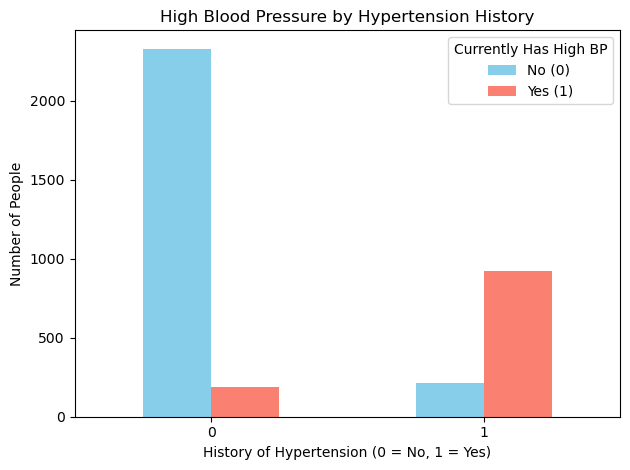

In [132]:
ct.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
plt.title('High Blood Pressure by Hypertension History')
plt.xlabel('History of Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Number of People')
plt.legend(title='Currently Has High BP', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Conclusion : 

Based on the Chi-square test and Phi Coefficient analysis, there is a strong and statistically significant positive association between having a history of hypertension and currently having high blood pressure (φ = 0.7413, p < 0.001).

* The p-value of 0.0000 indicates the relationship is highly statistically significant
* The Phi coefficient of 0.7413 reflects a strong positive correlation, suggesting that a history of hypertension is a strong predictor of current high blood pressure status

Individuals with a history of hypertension should be especially cautious, as they are at significantly higher risk of developing high blood pressure again.